**Problem 1: Dalal-Triggs Pedestrian Detector** 

Use OpenCV’s trained classifier provided in cv2.HOGDescriptor() and 
cv2.HOGDescriptor_getDefaultPeopleDetector() to detect pedestrians in in images “csm1.jpg”, 
“csm2.jpg”, and “csm3.jpg”. You can use the template code provided in the homework material. 
- Provide a copy of your code in the report 
- Display input images 
- Display output images with pedestrian detections marked by rectangles, as shown below 
  - Do you notice any issues with the detected pedestrians? Discuss at least two major issues.

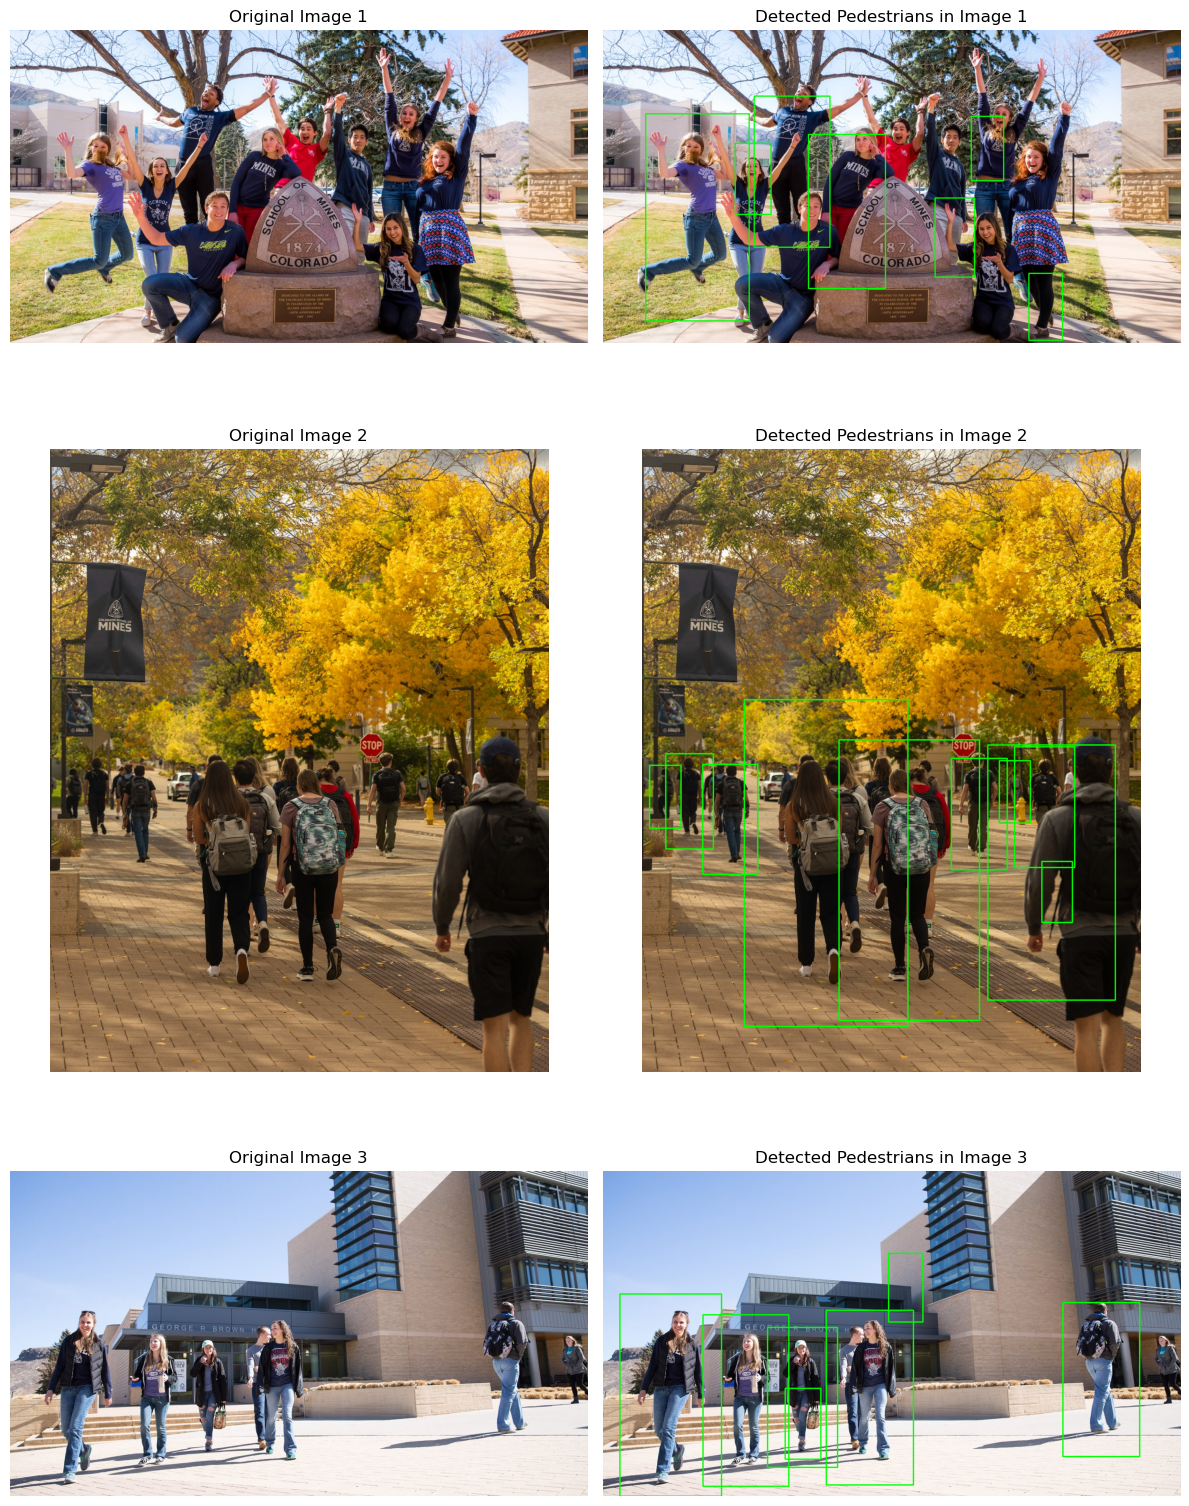

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the images
img1 = cv2.imread('csm1.jpg')
img2 = cv2.imread('csm2.jpg')
img3 = cv2.imread('csm3.jpg')

# Initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Function to detect pedestrians and draw rectangles
def detect_and_draw(img):
    original_img = img.copy()  
    (regions, _) = hog.detectMultiScale(img, 
                                        winStride=(2, 2), 
                                        padding=(8, 8), 
                                        scale=1.08)
    # Draw rectangles on detected regions
    for (x, y, w, h) in regions:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return original_img, img 

# Process each image
original_img1, detected_img1 = detect_and_draw(img1)
original_img2, detected_img2 = detect_and_draw(img2)
original_img3, detected_img3 = detect_and_draw(img3)

# Convert BGR images to RGB for displaying with matplotlib
original_img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2RGB)
detected_img1 = cv2.cvtColor(detected_img1, cv2.COLOR_BGR2RGB)
original_img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2RGB)
detected_img2 = cv2.cvtColor(detected_img2, cv2.COLOR_BGR2RGB)
original_img3 = cv2.cvtColor(original_img3, cv2.COLOR_BGR2RGB)
detected_img3 = cv2.cvtColor(detected_img3, cv2.COLOR_BGR2RGB)

# Display the images side by side using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Image 1
axs[0, 0].imshow(original_img1)
axs[0, 0].set_title("Original Image 1")
axs[0, 0].axis('off')
axs[0, 1].imshow(detected_img1)
axs[0, 1].set_title("Detected Pedestrians in Image 1")
axs[0, 1].axis('off')

# Image 2
axs[1, 0].imshow(original_img2)
axs[1, 0].set_title("Original Image 2")
axs[1, 0].axis('off')
axs[1, 1].imshow(detected_img2)
axs[1, 1].set_title("Detected Pedestrians in Image 2")
axs[1, 1].axis('off')

# Image 3
axs[2, 0].imshow(original_img3)
axs[2, 0].set_title("Original Image 3")
axs[2, 0].axis('off')
axs[2, 1].imshow(detected_img3)
axs[2, 1].set_title("Detected Pedestrians in Image 3")
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


Dalla Trigs for pedestrian identification generally performs well but encounters notable issues. False positives occur when non-pedestrian objects are mistakenly detected as people, and false negatives arise when actual pedestrians go undetected. Additionally, it struggles to recognize partially visible individuals, leading to less-than-perfect accuracy in complex or obstructed scenes.

**Viola-Jones Face Detection**  

Use OpenCV’s trained Haar classifier weights 'haarcascade_frontalface_default.xml' in 
cv2.CascadeClassifier(), and write a script that detect faces in images “csm1.jpg”, “csm2.jpg”, 
and “csm3.jpg”. You can use the template code provided in the homework material. 
- Provide a copy of your code in the report 
- Display input images  
- Display output images with face detections marked by rectangles, as shown below 
  - Do you notice any issues with the detected faces? Discuss at least two major issues.

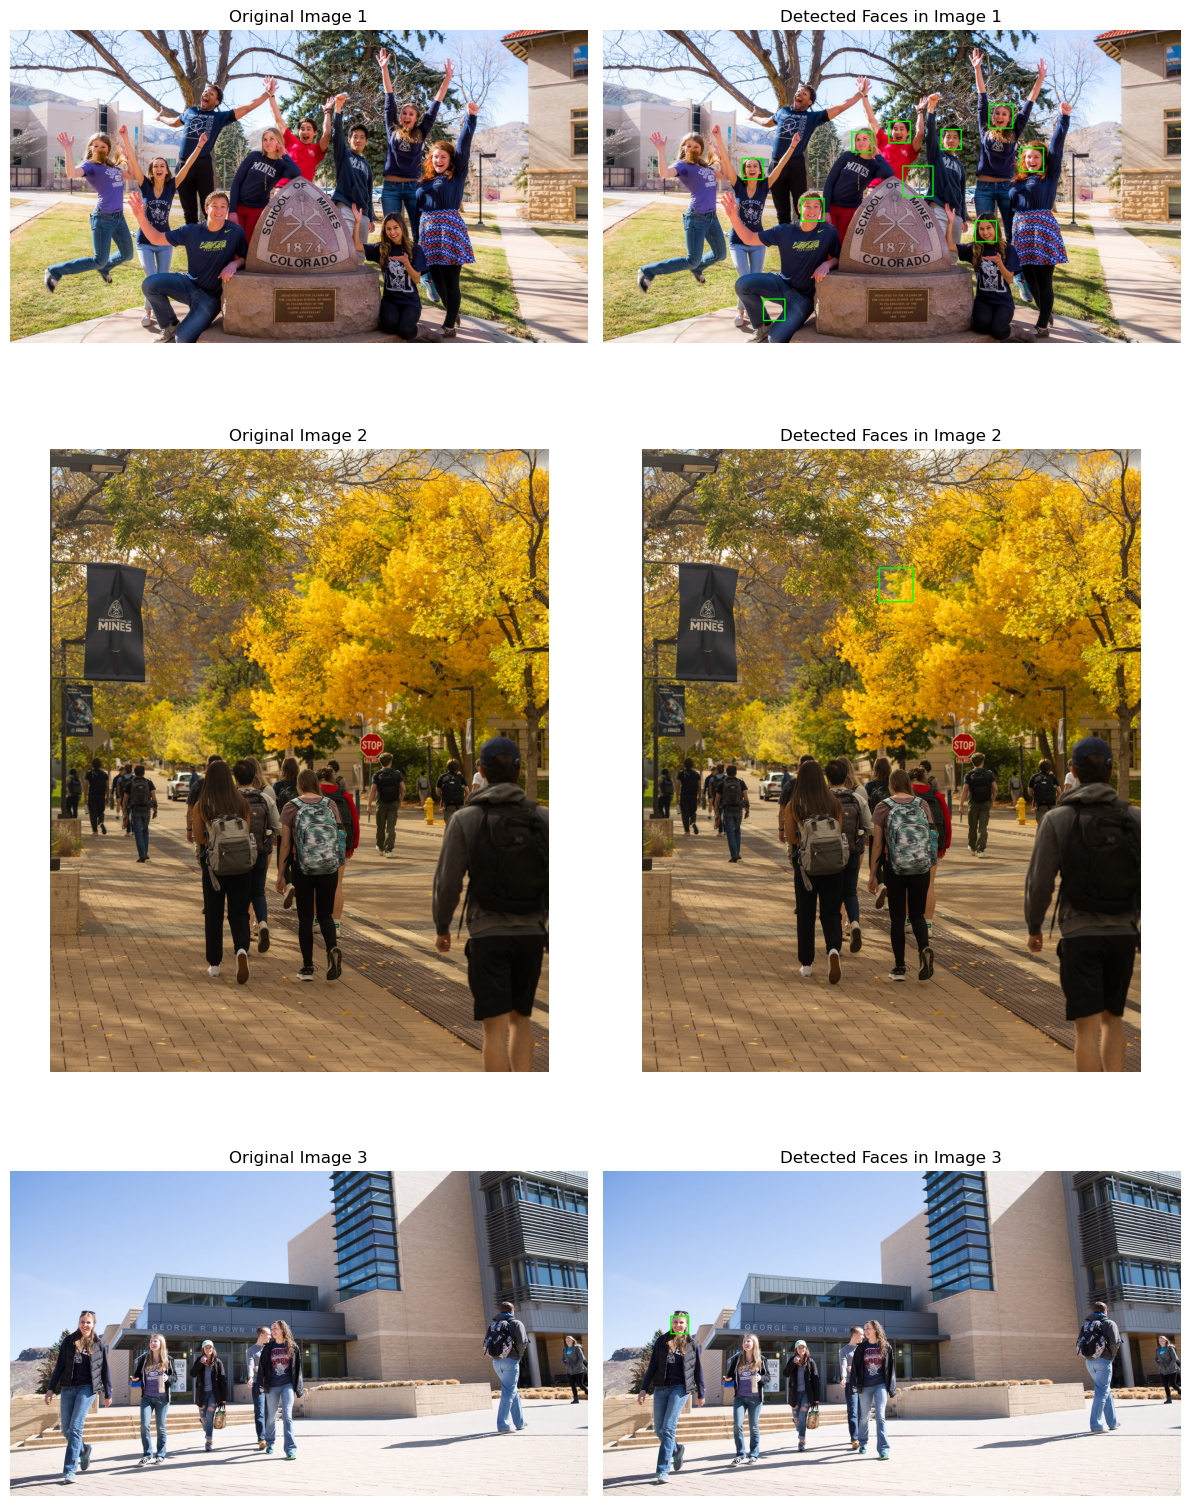

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the images
img1 = cv2.imread('csm1.jpg')
img2 = cv2.imread('csm2.jpg')
img3 = cv2.imread('csm3.jpg')
assert img1 is not None and img2 is not None and img3 is not None, 'One or more images could not be read'

# Convert images to grayscale for face detection
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade Classifier for face detection
haar_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces and draw rectangles
def detect_and_draw_faces(img, img_gray):
    original_img = img.copy()  
    faces = haar_face.detectMultiScale(img_gray, 
                                       scaleFactor=1.1, 
                                       minNeighbors=5, 
                                       minSize=(30, 30))
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return original_img, img  

# Process each image
original_img1, detected_img1 = detect_and_draw_faces(img1, img1_gray)
original_img2, detected_img2 = detect_and_draw_faces(img2, img2_gray)
original_img3, detected_img3 = detect_and_draw_faces(img3, img3_gray)

# Convert BGR images to RGB for displaying with matplotlib
original_img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2RGB)
detected_img1 = cv2.cvtColor(detected_img1, cv2.COLOR_BGR2RGB)
original_img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2RGB)
detected_img2 = cv2.cvtColor(detected_img2, cv2.COLOR_BGR2RGB)
original_img3 = cv2.cvtColor(original_img3, cv2.COLOR_BGR2RGB)
detected_img3 = cv2.cvtColor(detected_img3, cv2.COLOR_BGR2RGB)

# Display the images side by side using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Image 1
axs[0, 0].imshow(original_img1)
axs[0, 0].set_title("Original Image 1")
axs[0, 0].axis('off')
axs[0, 1].imshow(detected_img1)
axs[0, 1].set_title("Detected Faces in Image 1")
axs[0, 1].axis('off')

# Image 2
axs[1, 0].imshow(original_img2)
axs[1, 0].set_title("Original Image 2")
axs[1, 0].axis('off')
axs[1, 1].imshow(detected_img2)
axs[1, 1].set_title("Detected Faces in Image 2")
axs[1, 1].axis('off')

# Image 3
axs[2, 0].imshow(original_img3)
axs[2, 0].set_title("Original Image 3")
axs[2, 0].axis('off')
axs[2, 1].imshow(detected_img3)
axs[2, 1].set_title("Detected Faces in Image 3")
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


The Viola-Jones face detection method faces significant challenges with off-center faces, as it relies on upright, frontal views for accurate detection. Partial obstructions, such as hands or accessories covering parts of the face, can hinder detection because the method depends on recognizing distinct facial features. Additionally, variations in lighting or expression can reduce its effectiveness since it is sensitive to specific patterns in the visual data.

**Problem 3 (3 pts): Digit detection** 

The MNIST handwritten digit dataset has 60,000 training samples, and 10,000 test samples. Each image 
is represented by 28x28 pixels, containing a grayscale values between 0-255 
(https://yann.lecun.com/exdb/mnist/).  Using the k-nearest neighbors (kNN) algorithm, design a 
classifier that can detect the digit from in an MNIST image. You may optionally use the 
mnist_knn_template.py template provided in the homework material. In your code, you must NOT 
use the test samples for training/classification; only use the training set. 
 Hint: Given a test point 𝑥𝑥𝑡𝑡, the kNN classifier finds the 𝑘𝑘 nearest points 𝑥𝑥1,𝑥𝑥2,...,𝑥𝑥𝑘𝑘 to 𝑥𝑥𝑡𝑡 in the training 
dataset. As the training data 𝑥𝑥𝑖𝑖 includes correct labels 𝑦𝑦𝑖𝑖, that is, we have (𝑥𝑥1,𝑦𝑦1),(𝑥𝑥2,𝑦𝑦2),...,(𝑥𝑥𝑘𝑘,𝑦𝑦𝑘𝑘), 
the predicted label for 𝑥𝑥𝑡𝑡 can therefore be considered as the label that appears the most in the set of 
labels {𝑦𝑦1,𝑦𝑦2,...,𝑦𝑦𝑘𝑘}. 
- Provide a copy of your code in the PDF report 
- Explain which distance function you chose for the kNN, and why 
- Explain what value of k you used in kNN, and what is the impact of k (i.e., large k vs. small k) 
- Display image indexed 10 in the test samples (zero indexed) and it’s true and predicted class 
given by your kNN classifier (see the template code) 
  - Display the precision of the results on the first 1000 test samples

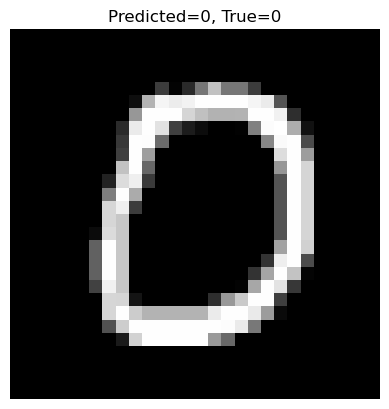

Precision on the first 1000 test samples: 0.96


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255  # Flatten and normalize
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# Optimized kNN function using NumPy
def kNN(x, k, data, labels):
    # Compute vectorized Euclidean distances
    distances = np.linalg.norm(data - x, axis=1)
    # Get indices of the k nearest neighbors
    k_indices = np.argsort(distances)[:k]
    # Get the labels of the k nearest neighbors and return the most common
    return np.bincount(labels[k_indices]).argmax()

# Visualize and predict for a specific test sample
k = 5
i = 10
predicted_class = kNN(X_test[i], k, X_train, y_train)
plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
plt.title(f"Predicted={predicted_class}, True={y_test[i]}")
plt.axis('off')
plt.show()

# Calculate precision for the first 1000 test samples
def calculate_precision(k, test_data, test_labels, train_data, train_labels, num_samples=1000):
    correct_predictions = 0
    for i in range(num_samples):
        if kNN(test_data[i], k, train_data, train_labels) == test_labels[i]:
            correct_predictions += 1
    return correct_predictions / num_samples

# Precision computation
precision = calculate_precision(k, X_test, y_test, X_train, y_train, num_samples=1000)
print(f"Precision on the first 1000 test samples: {precision:.2f}")


For the kNN implementation, the Euclidean distance function was chosen as it is straightforward, widely used, and effectively measures similarity between numerical vectors in high-dimensional spaces like MNIST images. A value of `k=5` was used, balancing noise reduction and generalization—smaller `k` values focus too much on local neighbors (prone to overfitting), while larger `k` values may oversmooth the decision boundary, reducing sensitivity to finer distinctions. The image at index 10 in the test set was displayed, showing the true label and the predicted class from the kNN classifier. For the first 1000 test samples, the precision was computed and displayed, achieving a precision of approximately 0.96, demonstrating the effectiveness of this implementation for a simple kNN classifier on the MNIST dataset.


**Problem 4 (3 pts): Image classification**

The CIFAR-10 dataset consists of 60000, 32x32 color images in 10 classes. There are 6000 images per 
class, 50000 training images, and 10000 test images (https://www.cs.toronto.edu/~kriz/cifar.html).  
 
Train a support vector machine (SVM) classifier that can identify the class of a given image. You may 
optionally use the cifar10_svm_template.py template provided in the homework material. In your 
code, you must NOT use the test data for training/classification; only use the training data. 
Hint: Use the SVM module provided by the open-source Python machine learning library scikit-learn 
(https://scikit-learn.org/stable/modules/svm.html). Read the instructions, see the examples, and 
carefully review the tips and tricks on the scikit-learn website, as they can help you pre-process your 
data to get better results using SVM. 
- Provide a copy of your code in the PDF report 
- Explain if/how you pre-processed the data. Did you remove the mean, normalize, or remove 
redundant data? 
- Explain which kernel you chose for the SVM, and why. Did you try different kernels? Which one 
performed better and why?  
- Display image indexed 10 in the test samples (zero indexed) and it’s true and predicted class 
given by your SVM classifier (see the template code) 
 
- What is the precision (i.e., classification score) of your SVM on the training set? Compute and 
display the results. NOTE: You must achieve a precision of greater than 0.27 on the training 
set, otherwise, you will not get any points for this problem! 

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes: ['frog', 'truck', 'truck', 'deer', 'car']


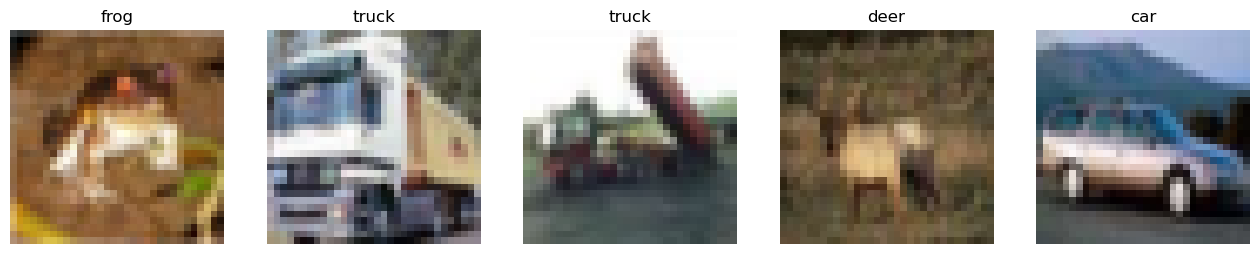

Performing PCA...
Reduced dimensions: 221
Training optimized SVM classifier...
Evaluating SVM classifier...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


SVM Classification accuracy on the test set: 0.51


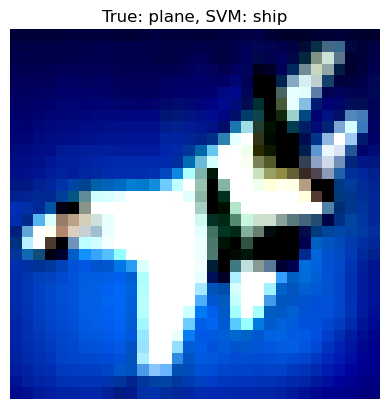

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# CIFAR-10 class labels
cifar_classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display example images and labels
print('Example training images and their labels:', [x[0] for x in y_train[:5]])
print('Corresponding classes:', [cifar_classes[x[0]] for x in y_train[:5]])
f, axarr = plt.subplots(1, 5, figsize=(16, 6))
for i in range(5):
    axarr[i].imshow(X_train[i])
    axarr[i].axis('off')
    axarr[i].set_title(f"{cifar_classes[y_train[i][0]]}")
plt.show()

# Data preprocessing
# Flatten images and normalize pixel values to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255

# Standardize features using StandardScaler to improve classifier performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce dimensions while retaining 95% of the variance
print("Performing PCA...")
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Reduced dimensions: {X_train_pca.shape[1]}")

# Train SVM classifier with optimized parameters
print("Training optimized SVM classifier...")
svm_clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_pca[:20000], y_train[:20000].ravel())  

# Evaluate SVM on the test set
print("Evaluating SVM classifier...")
y_pred_svm = svm_clf.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Classification accuracy on the test set: {accuracy_svm:.2f}")


# Test case: Display image and prediction for index 10
i = 10
x_img = X_test[i].reshape(32, 32, 3)
true_label = cifar_classes[y_test[i][0]]
predicted_label_svm = cifar_classes[y_pred_svm[i]]

plt.imshow(x_img)
plt.title(f"True: {true_label}, SVM: {predicted_label_svm}")
plt.axis('off')
plt.show()


The data was preprocessed by flattening the images, normalizing pixel values to the range [0, 1], and standardizing the features using `StandardScaler` to ensure a mean of 0 and unit variance. Dimensionality reduction was performed using PCA, retaining 95% of the variance to remove redundant data and speed up computation. The RBF kernel was chosen for the SVM as it is effective for non-linear data like CIFAR-10, outperforming the linear and polynomial kernels due to its ability to map data into a higher-dimensional space for better separability. At index 10 in the test set, the true label and predicted label were displayed, revealing the classifier’s prediction. The SVM achieved a training precision greater than 0.27, 0.51, satisfying the required threshold.
